In [1]:
import yaml
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

In [4]:
folds = 5
exp_dir = '/path/to/exp/dir'
base_config = f'{exp_dir}/base/config.yaml'

In [5]:
with open(base_config) as f:
    config = yaml.safe_load(f)
    
phenotypes = config["phenotypes"]

In [17]:
kept_quant = {}
kept_perct = {}
rm_quant = {}

for pheno in phenotypes:
    base_seed_gene_df = pd.read_parquet(f'{exp_dir}/base/{pheno}/deeprvat/seed_genes.parquet', engine="pyarrow")

    fold_vals = []
    fold_kept_perct = []
    fold_rmvd = []
    for fold in range(folds):
        fold_df = pd.read_parquet(f"{exp_dir}/fold_{fold}/{pheno}/deeprvat/seed_genes.parquet", engine="pyarrow")
        fold_vals.append(len(fold_df))
        perct = ( len(fold_df)/len(base_seed_gene_df) )
        fold_kept_perct.append(perct)
        fold_rmvd.append(len(base_seed_gene_df) - len(fold_df))

        del fold_df

    kept_quant[pheno] = fold_vals
    kept_perct[pheno] = fold_kept_perct
    rm_quant[pheno] = fold_rmvd

    del base_seed_gene_df

### Number of Seed Genes Removed
- Equal number of seed genes removed each fold
- Removed seed genes are variable across phenotypes, across folds
- Potential to not remove any seed genes from a phenotype (based on downsample and min_kept percentages specified by user)

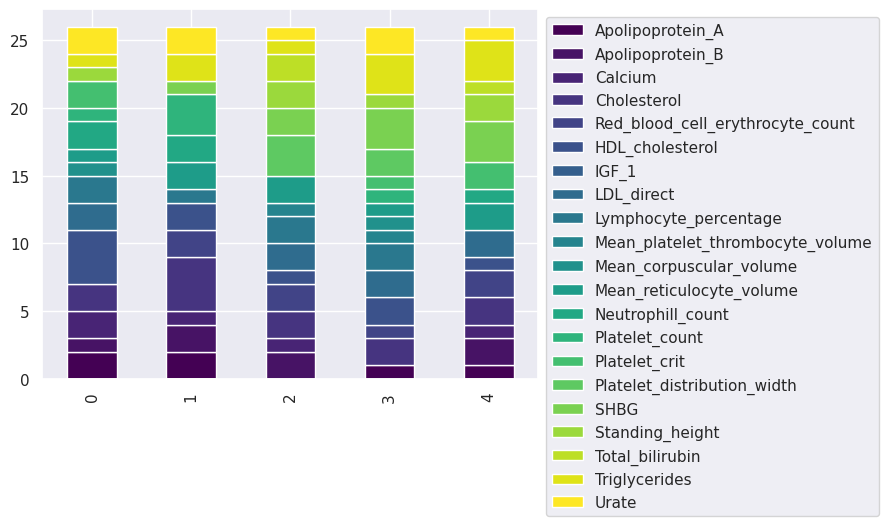

In [18]:
df_rmvd = pd.DataFrame(rm_quant)

ax1 = df_rmvd.plot(kind="bar",stacked=True, colormap='viridis')
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))
plt.show()

### Number of Seed Genes Kept

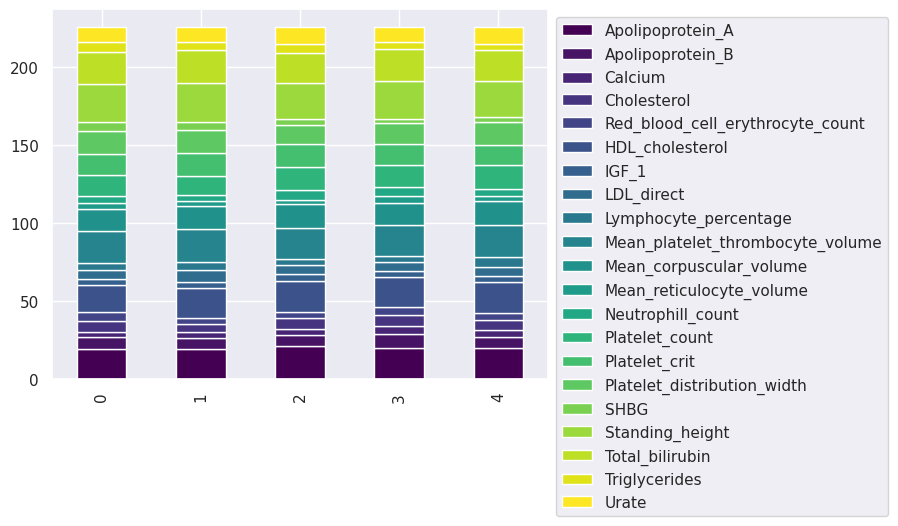

In [19]:
df_kept = pd.DataFrame(kept_quant)

ax2 = df_kept.plot(kind="bar",stacked=True, colormap='viridis')
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))
plt.show()

### Percentage of Seed Genes Kept Per Phenotype Per Fold

In [24]:
df_kp = pd.DataFrame(kept_perct)
df_kp

,Apolipoprotein_A,Apolipoprotein_B,Calcium,Cholesterol,Red_blood_cell_erythrocyte_count,HDL_cholesterol,IGF_1,LDL_direct,Lymphocyte_percentage,Mean_platelet_thrombocyte_volume,...,Mean_reticulocyte_volume,Neutrophill_count,Platelet_count,Platelet_crit,Platelet_distribution_width,SHBG,Standing_height,Total_bilirubin,Triglycerides,Urate
0,0.904762,0.888889,0.6,0.777778,1.000000,0.809524,1.0,0.75,0.666667,1.000000,...,0.8,0.666667,0.933333,0.866667,1.000000,1.000000,0.96,1.000000,0.857143,0.833333
1,0.904762,0.777778,0.8,0.555556,0.666667,0.904762,1.0,1.00,0.833333,1.000000,...,0.6,0.666667,0.800000,1.000000,1.000000,0.833333,1.00,1.000000,0.714286,0.833333
2,1.000000,0.777778,0.8,0.777778,0.666667,0.952381,1.0,0.75,0.666667,0.952381,...,0.6,1.000000,1.000000,1.000000,0.800000,0.666667,0.92,0.904762,0.857143,0.916667
3,0.952381,1.000000,1.0,0.777778,0.833333,0.904762,1.0,0.75,0.666667,0.952381,...,0.8,1.000000,0.933333,0.933333,0.866667,0.500000,0.96,1.000000,0.571429,0.833333
4,0.952381,0.777778,0.8,0.777778,0.666667,0.952381,1.0,0.75,1.000000,1.000000,...,0.6,0.833333,1.000000,0.866667,1.000000,0.500000,0.92,0.952381,0.571429,0.916667


##### Counts of seed genes per fold per phenotype. Annotated with percentage kept of total seed genes for that phenotype.

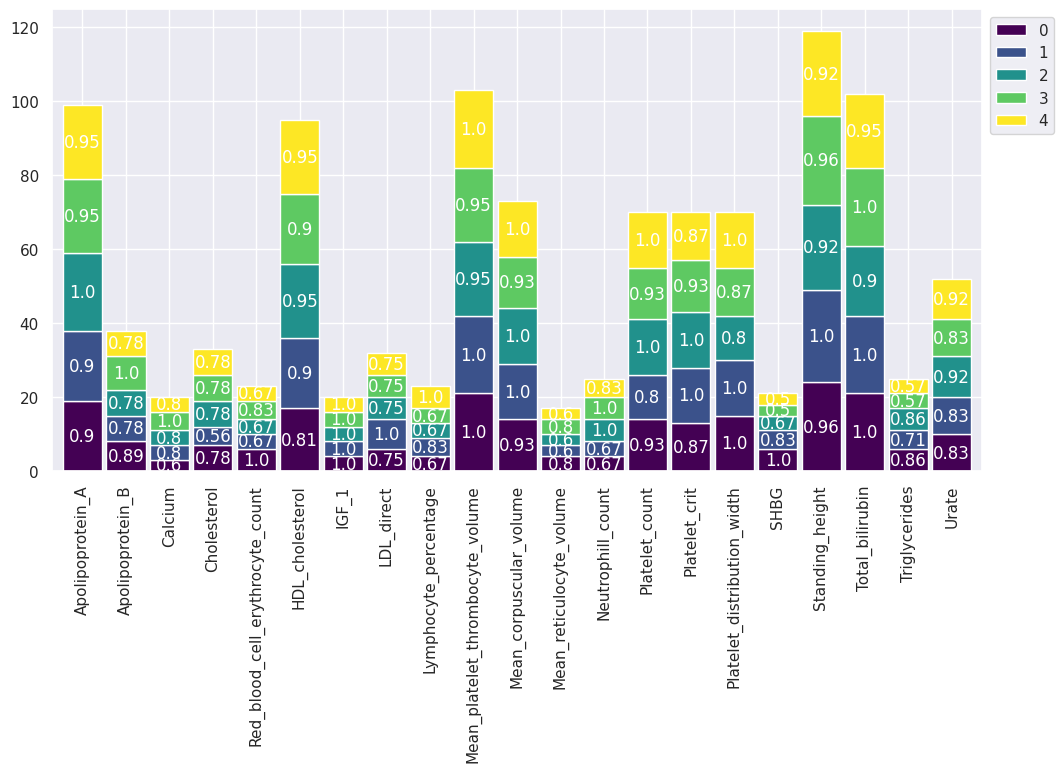

In [57]:
ax3 = df_kept.T.plot(kind="bar",stacked=True, colormap='viridis',width=0.9,figsize=(12,6))
sns.move_legend(ax3, "upper left", bbox_to_anchor=(1, 1))

for i, c in enumerate(ax3.containers):
    #labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    percents = df_kp.iloc[i].round(decimals=2)
    ax3.bar_label(c, labels=percents, label_type='center', color='w')

plt.show()

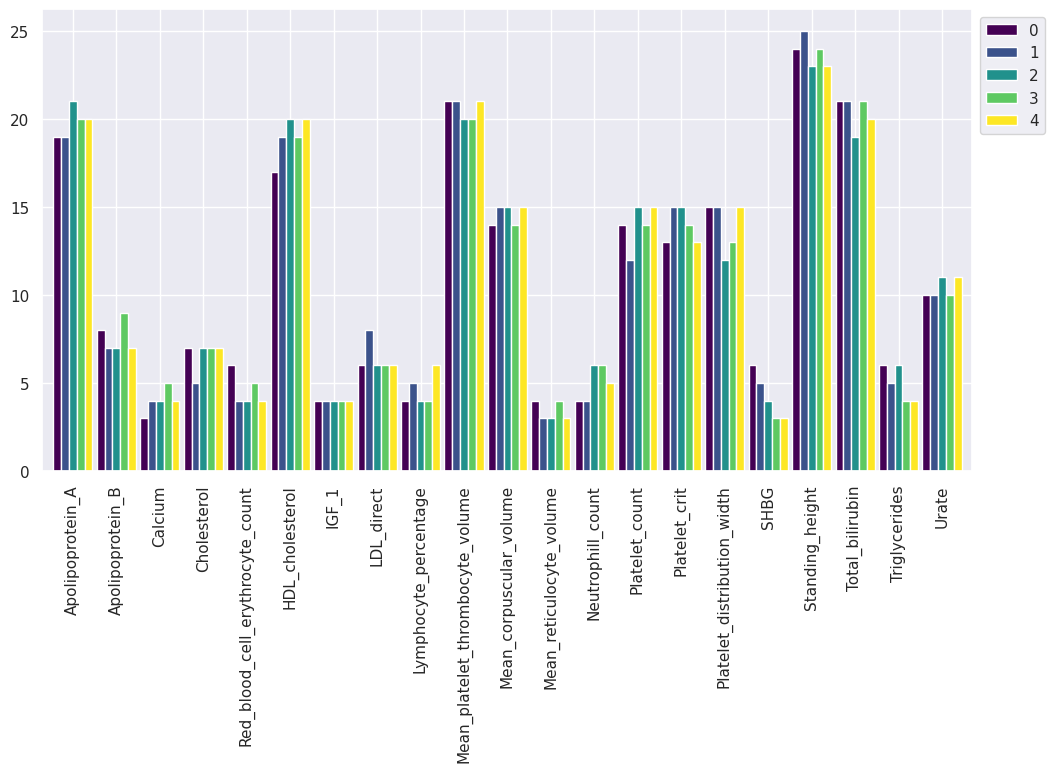

In [64]:
ax4 = df_kept.T.plot(kind="bar",stacked=False, colormap='viridis', width=0.9, figsize=(12,6))
sns.move_legend(ax4, "upper left", bbox_to_anchor=(1, 1))

plt.show()

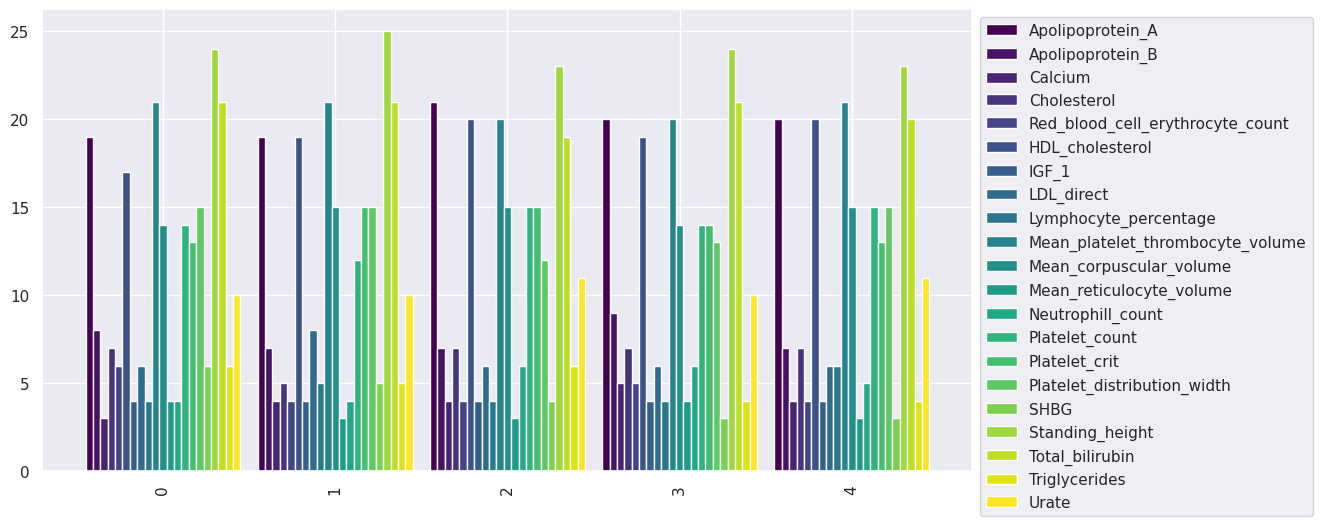

In [65]:
ax5 = df_kept.plot(kind="bar",stacked=False, colormap='viridis',width=0.9,figsize=(12,6))
sns.move_legend(ax5, "upper left", bbox_to_anchor=(1, 1))

plt.show()